## Segundo Modelo

Rede Neural Convolucional

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sys
sys.path.append('../')

print(tf.__version__)

2.4.1


In [2]:
from ml.keras_pipelines import run_pipeline_02

In [3]:
data_path = '../data/processed/'
model_path = '../models/'
model_name = 'keras02_cnn'

In [4]:
# Carregando os dados
test_images = np.load(data_path+"test_images.npy")
test_labels = np.load(data_path+"test_labels.npy")
test_images = test_images.reshape(len(test_labels), 28, 28, 1)


In [5]:
# Normalizando os dados
test_images = test_images / 255.0

In [6]:
# Treinando, avaliando e salvando o modelo
run_pipeline_02(data_path, model_name, model_path)

Epoch 1/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4398 - accuracy: 0.8656
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0972 - accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0594 - accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0409 - accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0292 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0215 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0146 - accuracy: 0.9957
Epoch 8/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0113 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0084 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 55s 29m

In [7]:
# Carregando o modelo
model = keras.models.load_model(model_path + f'{model_name}')

In [8]:
# Resumo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [9]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions,axis=1)

In [10]:
for y_real, y_pred in zip(predictions[:10],test_labels[:10]):
    print(f"Valor Real:{y_real} ===> Prev.:{y_pred}")

Valor Real:7 ===> Prev.:7
Valor Real:2 ===> Prev.:2
Valor Real:1 ===> Prev.:1
Valor Real:0 ===> Prev.:0
Valor Real:4 ===> Prev.:4
Valor Real:1 ===> Prev.:1
Valor Real:4 ===> Prev.:4
Valor Real:9 ===> Prev.:9
Valor Real:5 ===> Prev.:5
Valor Real:9 ===> Prev.:9


Text(69.0, 0.5, 'Truth')

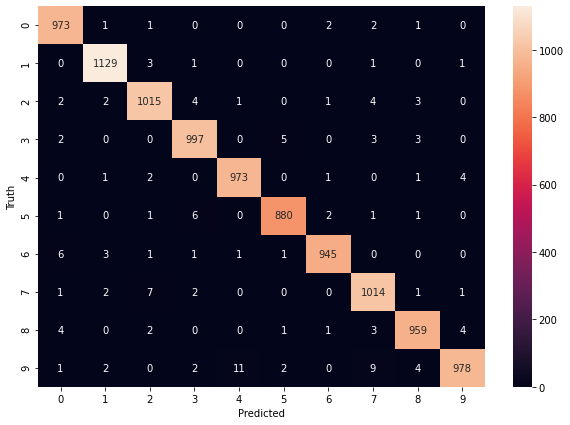

In [11]:
# Matriz de confusão
cm = tf.math.confusion_matrix(labels=test_labels, predictions=predictions)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')